# Data Cleaning and Exploratory Data Analysis (EDA) on the Final CSV Data

In [1]:
import pandas as pd
# Load the final CSV data into a DataFrame
final_data = pd.read_csv('final_data.csv')
# Display the first few rows of the dataset
final_data.head()

,Unnamed: 0,property_id,check_in_date,room_id,successful_bookings,capacity,mmm yy,week no,occupancy_rate,property_name,is_weekend
0,0,16559,2022-05-01,RT1,25,30,May 22,19,83.0,Atliq Exotica,1
1,1,19562,2022-05-01,RT1,28,30,May 22,19,93.0,Atliq Bay,1
2,2,19563,2022-05-01,RT1,23,30,May 22,19,77.0,Atliq Palace,1
3,3,17558,2022-05-01,RT1,13,19,May 22,19,68.0,Atliq Grands,1
4,4,16558,2022-05-01,RT1,18,19,May 22,19,95.0,Atliq Grands,1


In [2]:
# Check for missing values in the dataset
missing_values = final_data.isnull().sum()
print(missing_values)


Unnamed: 0             0
property_id            0
check_in_date          0
room_id                0
successful_bookings    0
capacity               0
mmm yy                 0
week no                0
occupancy_rate         0
property_name          0
is_weekend             0
dtype: int64


In [3]:
# Convert columns to appropriate data types
final_data['property_id'] = final_data['property_id'].astype(str)
final_data['check_in_date'] = pd.to_datetime(final_data['check_in_date'])
final_data['week no'] = final_data['week no'].astype(int)
final_data['is_weekend'] = final_data['is_weekend'].astype(bool)

# Verify data types
final_data.dtypes


Unnamed: 0                      int64
property_id                    object
check_in_date          datetime64[ns]
room_id                        object
successful_bookings             int64
capacity                        int64
mmm yy                         object
week no                         int32
occupancy_rate                float64
property_name                  object
is_weekend                       bool
dtype: object

In [4]:
# Check for duplicate rows
duplicates = final_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicate rows if any
final_data.drop_duplicates(inplace=True)


Number of duplicate rows: 0


In [5]:
# Display summary statistics for the numerical columns
final_data.describe()


,Unnamed: 0,check_in_date,successful_bookings,capacity,week no,occupancy_rate
count,9200.000000,9200,9200.000000,9200.000000,9200.000000,9200.000000
mean,4599.500000,2022-06-15 12:00:00,14.629348,25.280000,25.076087,58.312500
min,0.000000,2022-05-01 00:00:00,1.000000,3.000000,19.000000,21.000000
25%,2299.750000,2022-05-23 18:00:00,9.000000,18.000000,22.000000,47.000000
50%,4599.500000,2022-06-15 12:00:00,14.000000,25.000000,25.000000,56.000000
75%,6899.250000,2022-07-08 06:00:00,19.000000,34.000000,28.000000,67.000000
max,9199.000000,2022-07-31 00:00:00,43.000000,50.000000,32.000000,100.000000
std,2655.955572,NaN,7.591770,11.440971,3.791597,15.282606


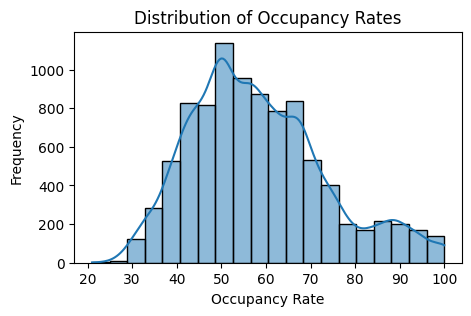

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of occupancy rates
plt.figure(figsize=(5, 3))
sns.histplot(final_data['occupancy_rate'], bins=20, kde=True)
plt.title('Distribution of Occupancy Rates')
plt.xlabel('Occupancy Rate')
plt.ylabel('Frequency')
plt.show()


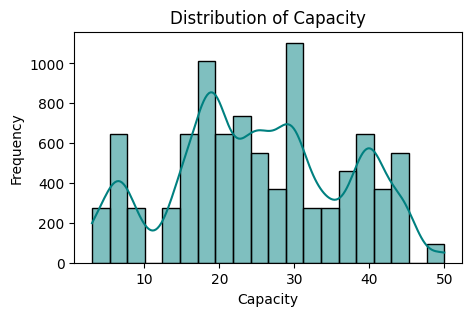

In [12]:
# 1. Distribution of Capacity
plt.figure(figsize=(5, 3))
sns.histplot(final_data['capacity'], bins=20, kde=True, color='teal')
plt.title('Distribution of Capacity')
plt.xlabel('Capacity')
plt.ylabel('Frequency')
plt.show()


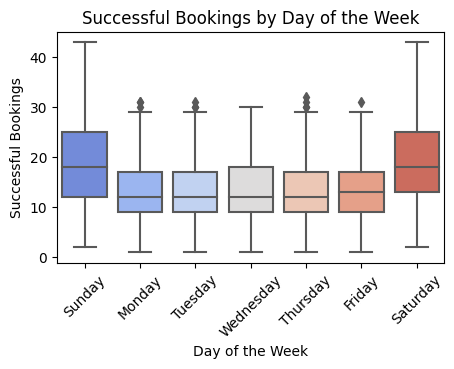

In [15]:
# Successful Bookings vs. Days of the Week
plt.figure(figsize=(5, 3))
final_data['day_of_week'] = final_data['check_in_date'].dt.day_name()
sns.boxplot(x='day_of_week', y='successful_bookings', data=final_data, palette='coolwarm')
plt.title('Successful Bookings by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Successful Bookings')
plt.xticks(rotation=45)
plt.show()

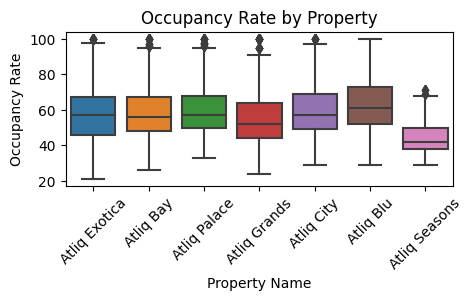

In [22]:
# Plot occupancy rates for each property
plt.figure(figsize=(5, 2))
sns.boxplot(x='property_name', y='occupancy_rate', data=final_data)
plt.title('Occupancy Rate by Property')
plt.xticks(rotation=45)
plt.xlabel('Property Name')
plt.ylabel('Occupancy Rate')
plt.show()


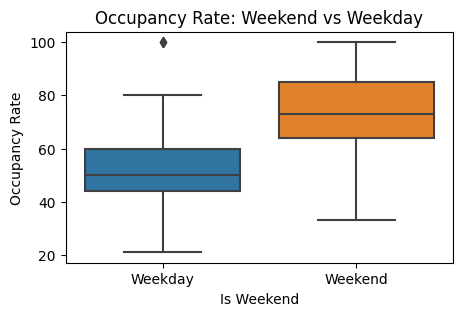

In [23]:
# Plot occupancy rates for weekends vs weekdays
plt.figure(figsize=(5, 3))
sns.boxplot(x='is_weekend', y='occupancy_rate', data=final_data)
plt.title('Occupancy Rate: Weekend vs Weekday')
plt.xlabel('Is Weekend')
plt.ylabel('Occupancy Rate')
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.show()


C:\Users\RAHUL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\RAHUL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\RAHUL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\RAHUL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\RAHUL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigne

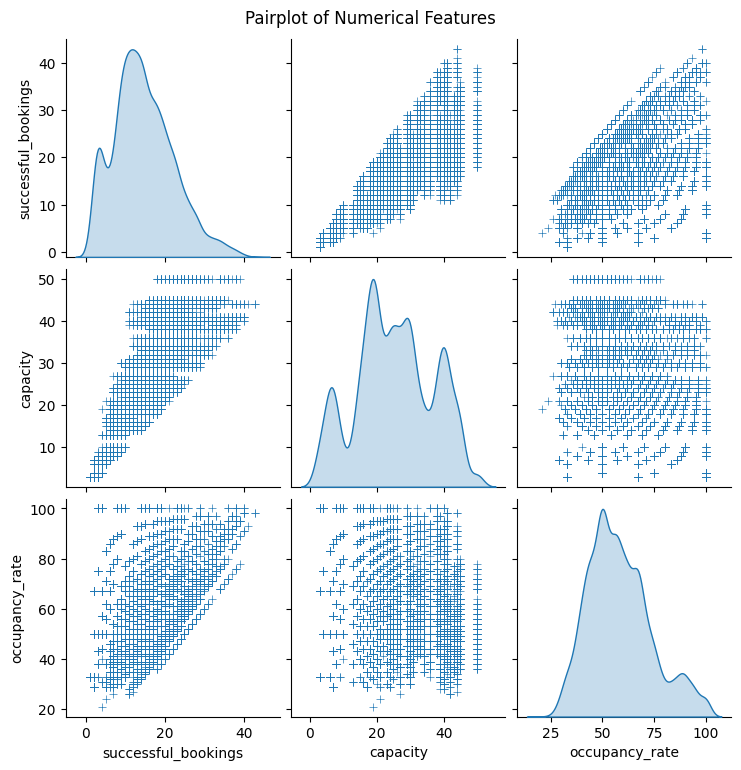

In [17]:
# 4. Pairplot of Numerical Features
sns.pairplot(final_data[['successful_bookings', 'capacity', 'occupancy_rate']], diag_kind='kde', markers='+', palette='Set2')
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

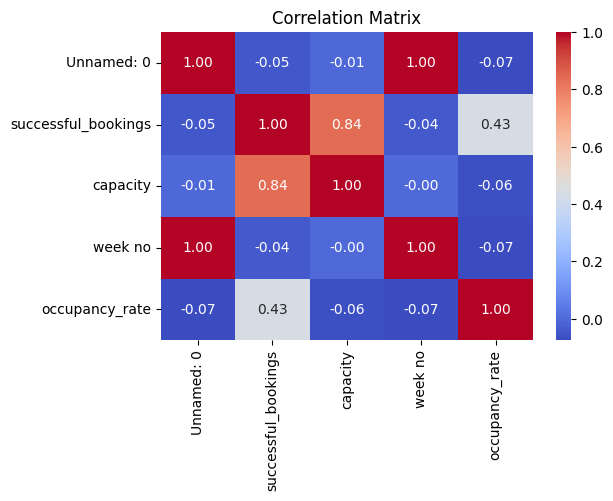

In [10]:
# Select only numeric columns
import numpy as np
numeric_columns = final_data.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


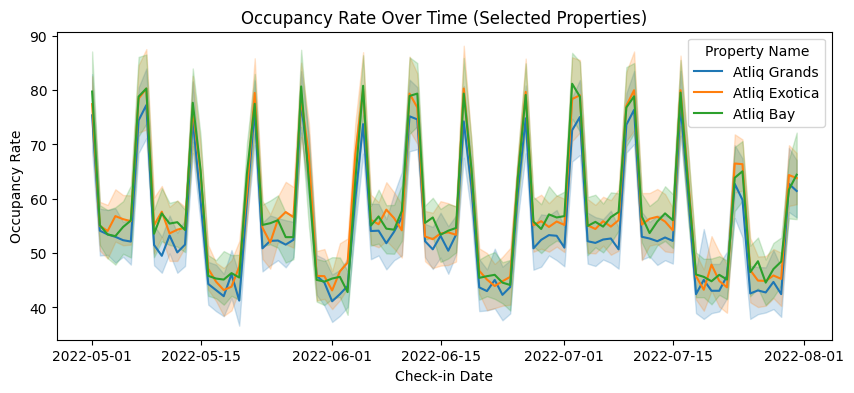

In [21]:
# 5. Occupancy Rate by Property over Time (Selected Properties)
selected_properties = ['Atliq Grands', 'Atliq Exotica', 'Atliq Bay']
plt.figure(figsize=(10, 4))
for property in selected_properties:
    property_data = final_data[final_data['property_name'] == property]
    sns.lineplot(x='check_in_date', y='occupancy_rate', data=property_data, label=property)
plt.title('Occupancy Rate Over Time (Selected Properties)')
plt.xlabel('Check-in Date')
plt.ylabel('Occupancy Rate')
plt.legend(title='Property Name')
plt.show()